In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 496.9/496.9 kB 12.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 21.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60


In [6]:
%%my_datas.yaml

train: train  # train images (relative to 'path') 1281167 images
val: val  # val images (relative to 'path') 50000 images
test:  # test images (optional)

# Classes
names:
  0: alouatta_palliata
  1: erythrocebus_patas
  2: cacajao_calvus
  3: macaca_fuscata
  4: cebuella_pygmea
    


Writing datasets/my_datas.yaml


In [7]:
!ls datasets

Argoverse.yaml	      SKU-110K.yaml  coco128-seg.yaml  my_datas.yaml
GlobalWheat2020.yaml  VOC.yaml	     coco128.yaml      xView.yaml
ImageNet.yaml	      VisDrone.yaml  coco8-seg.yaml
Objects365.yaml       coco.yaml      coco8.yaml


In [8]:
%%writefile /yolov8l.yaml
# Ultralytics YOLO 🚀, GPL-3.0 license

# Parameters
nc: 5  # number of classes
depth_multiple: 1.00  # scales module repeats
width_multiple: 1.00  # scales convolution channels

# YOLOv8.0l backbone
backbone:
  # [from, repeats, module, args]
  - [-1, 1, Conv, [64, 3, 2]]  # 0-P1/2
  - [-1, 1, Conv, [128, 3, 2]]  # 1-P2/4
  - [-1, 3, C2f, [128, True]]
  - [-1, 1, Conv, [256, 3, 2]]  # 3-P3/8
  - [-1, 6, C2f, [256, True]]
  - [-1, 1, Conv, [512, 3, 2]]  # 5-P4/16
  - [-1, 6, C2f, [512, True]]
  - [-1, 1, Conv, [512, 3, 2]]  # 7-P5/32
  - [-1, 3, C2f, [512, True]]
  - [-1, 1, SPPF, [512, 5]]  # 9

# YOLOv8.0l head
head:
  - [-1, 1, nn.Upsample, [None, 2, 'nearest']]
  - [[-1, 6], 1, Concat, [1]]  # cat backbone P4
  - [-1, 3, C2f, [512]]  # 12

  - [-1, 1, nn.Upsample, [None, 2, 'nearest']]
  - [[-1, 4], 1, Concat, [1]]  # cat backbone P3
  - [-1, 3, C2f, [256]]  # 15 (P3/8-small)

  - [-1, 1, Conv, [256, 3, 2]]
  - [[-1, 12], 1, Concat, [1]]  # cat head P4
  - [-1, 3, C2f, [512]]  # 18 (P4/16-medium)

  - [-1, 1, Conv, [512, 3, 2]]
  - [[-1, 9], 1, Concat, [1]]  # cat head P5
  - [-1, 3, C2f, [512]]  # 21 (P5/32-large)

  - [[15, 18, 21], 1, Detect, [nc]]  # Detect(P3, P4, P5)

Overwriting models/v8/yolov8l.yaml


In [13]:
!ls /weights

best.pt  last.pt


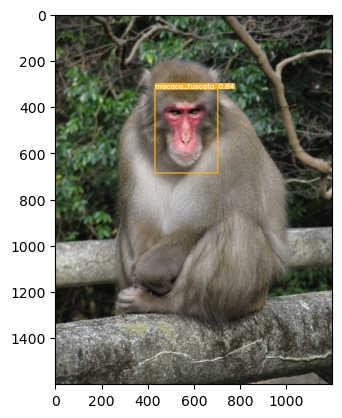

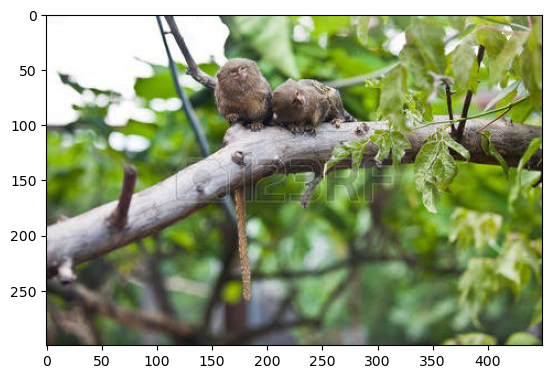

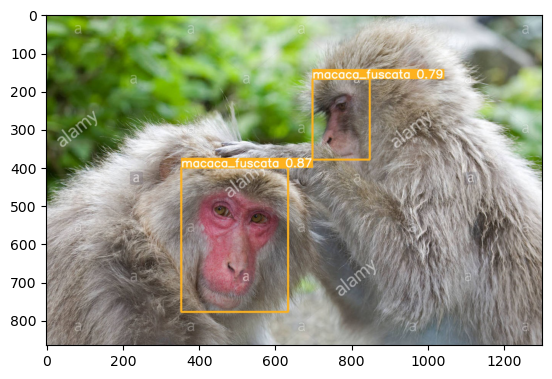

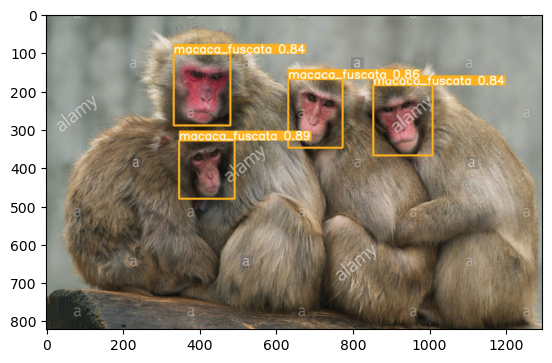

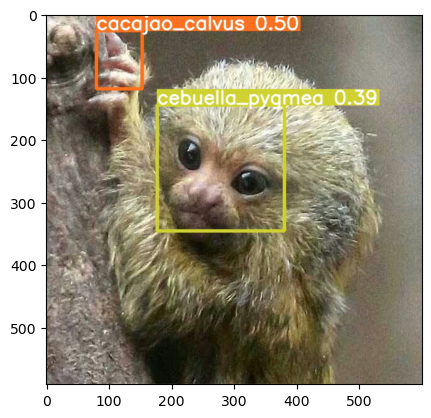

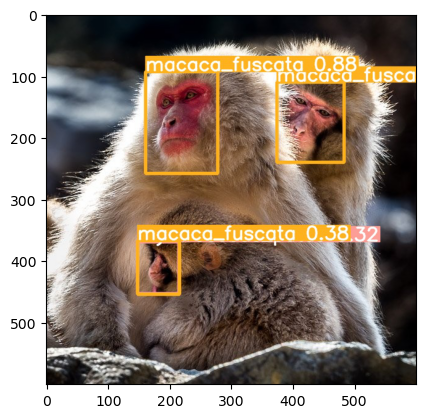

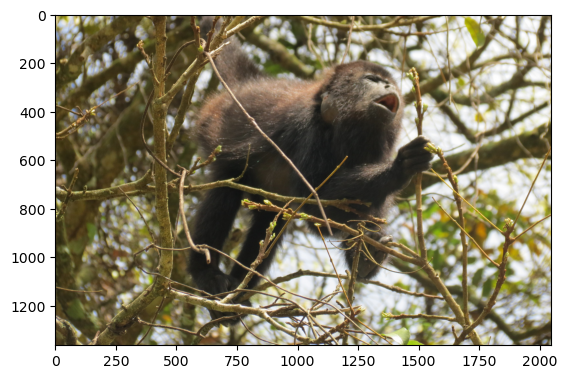

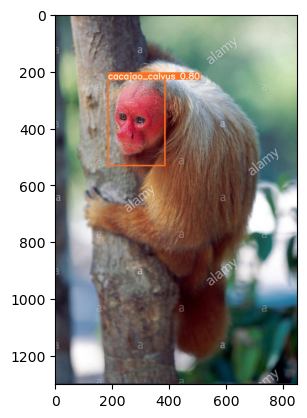

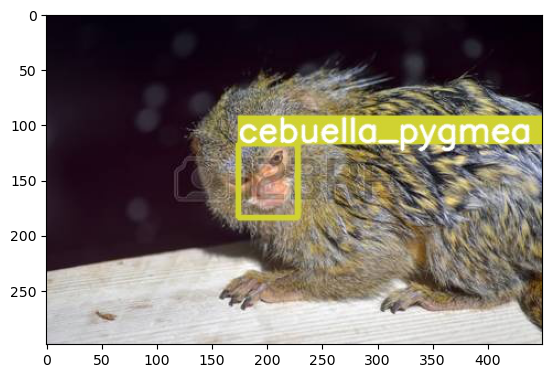

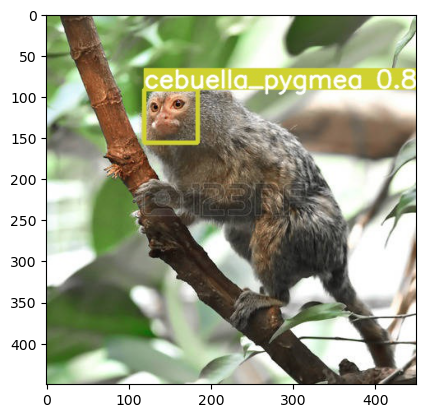

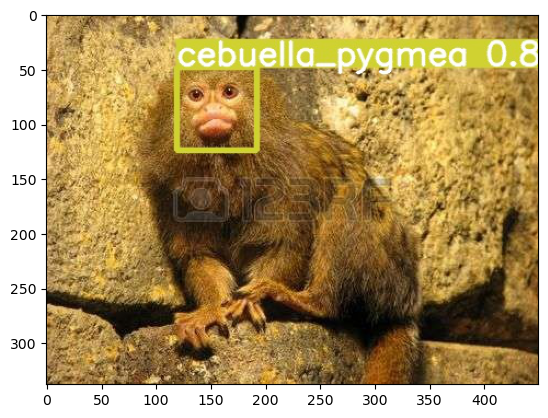

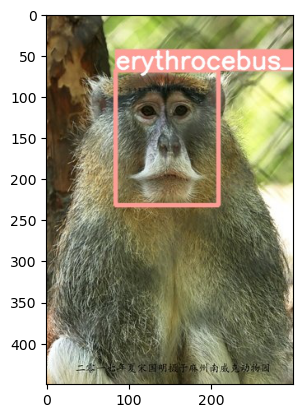

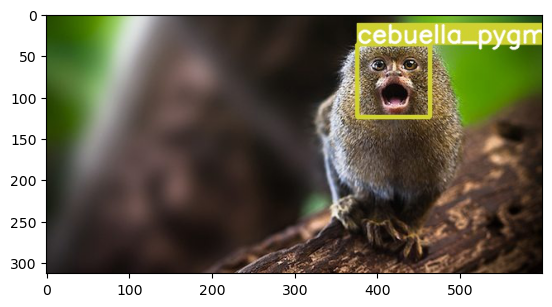

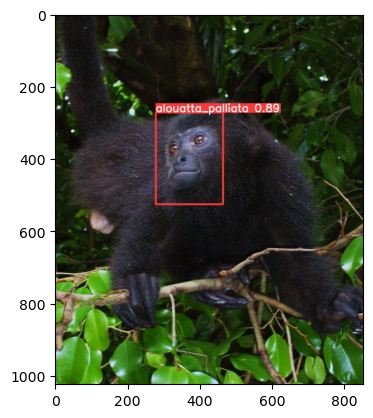

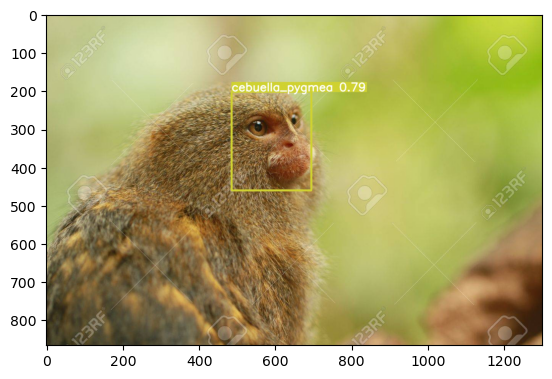

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os
files = os.listdir('predict')
for file in files:
    img = Image.open("predict/"+file)
    # img.show() # 会调用系统的显示窗口
    plt.figure('image')
    plt.imshow(img)
    plt.show()
